# Projets -  idées  innovantes d’applications en lien avec l'alimentation

## Résumé 

On veut savoir les aliments les plus addapté pour une personne que envisage d'aquerir de bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega, omega 9, du sel et sucre non necessaire, vitamines, fibres, mineraux, proteines et calcium. Cela en evitant les additifs et on previlegient les aliments avec un nutriscore et ecoscore favorable.

## Méthode 

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

### Telechargement des données

In [162]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

file = pathlib.Path('DATA/FR.openfoodfacts.org.products.csv')

if file.exists ():
    df =pd.read_csv('DATA/FR.openfoodfacts.org.products.csv')
    print ("File exist")
else:
    df = pd.read_csv("DATA/en.openfoodfacts.org.products.csv",
                     sep="\t", encoding="utf-8", low_memory=False)
    df=df.fillna('Chinee')
    #Selectioner seulement les donnees du marche Français
    mask = (df['countries_en'].str.contains('France', regex=False))
    df = df[mask]
    df.to_csv ('DATA/FR.openfoodfacts.org.products.csv', index = False, header=True)
    print ("Create FR File")
    

KeyboardInterrupt: 

In [152]:
df.head().T.to_excel("e.xlsx")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Traiter les doublons

In [73]:
df_dup = df.duplicated().sum()
if df_dup>0:
    df = df.drop_duplicates()
    print('Total doublons:  ',df_dup)

In [74]:
List_projet =  ['product_name','categories','nutriscore_grade','nutriscore_score','nova_group','ecoscore_grade_fr','ecoscore_score_fr',
                'countries_en','origins_tags','labels','allergens','additives_en','ingredients_from_palm_oil_n',
                'ingredients_that_may_be_from_palm_oil_n','fat_100g','saturated-fat_100g','energy-kcal_100g','energy-kj_100g',
                'carbon-footprint-from-meat-or-fish_100g','carbohydrates_100g','omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g',
                'cholesterol_100g','trans-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g',
                'alcohol_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g',
                'vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','calcium_100g',
                'vitamin-b6_100g','vitamin-b9_100g','vitamin-b12_100g','fruits-vegetables-nuts_100g']
filtered_df = df.loc[:,List_projet]




In [102]:
def remove_outlier(df_in,q1value,q3value):
    import copy
    df_out = copy.deepcopy(df_in)
    
    q1 =df_in.quantile(q1value)
    q3 =df_in.quantile(q3value)
    iqr = q3-q1  
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #===== Remove
    df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]
    return df_out

In [76]:
def isnull_values_sum(df):
    taille = len(df)/2
    null   = df.isnull().sum() 
    b=null.le(taille)
    cols_to_keep = df.columns[b]
    df = df.loc[:, cols_to_keep]
    return df

In [77]:
def group_and_loc_group(df,categ):
    grouped = df.groupby(categ, as_index=False)
    df_grouped=[]
    for i in grouped.groups.keys():
        loc=grouped.groups[i]
        df_grouped.append(pd.DataFrame(df.iloc[loc]))
    return grouped, df_grouped

In [78]:
def plot_box_plot(df,xlabel_name,ylabel_name):
    color = dict(boxes='black', whiskers='black', medians='red', caps='black')
    ax = df.plot.box(color=color,whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),figsize=(24, 8),fontsize=18)
    ax.set_xlabel(xlabel_name,fontsize=18)
    ax.set_ylabel(ylabel_name,fontsize=18)
    plt.grid(color='k', linestyle='-', linewidth=.1)
    plt.xticks(rotation=90)
    ax.label_outer() 

    plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

#### Traiter les valeurs aberrants

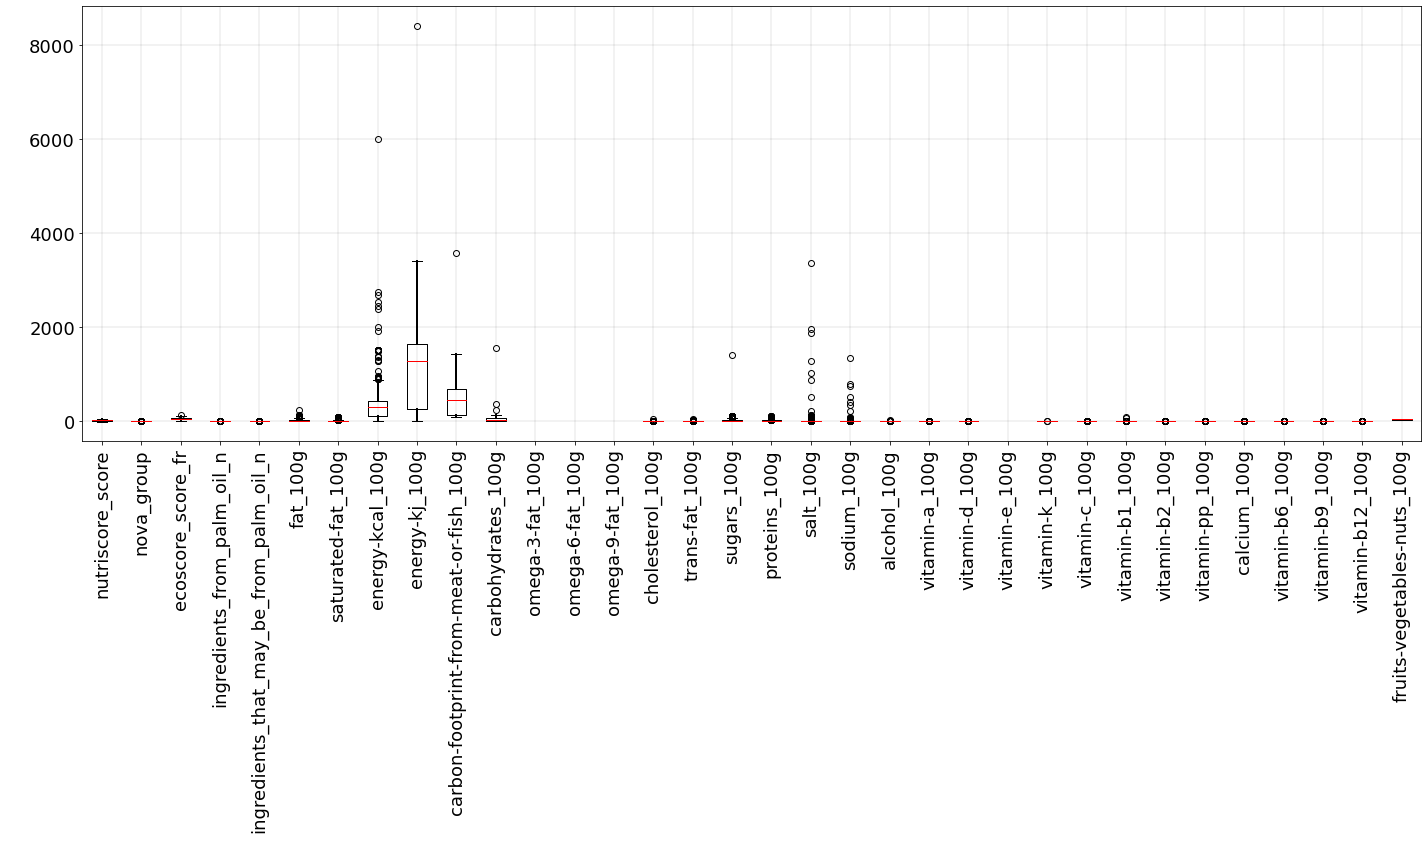

In [105]:
figure_name ='FIGURES/Outliers.jpeg'

ylabel = " "
xlabel = " "
ax = plot_box_plot(filtered_df,xlabel,ylabel)

In [106]:
q1value=0.05
q3value=0.95
df1 = remove_outlier(filtered_df,q1value,q3value)

9381


<ipython-input-102-0d6550d21d0c>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]
<ipython-input-102-0d6550d21d0c>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]


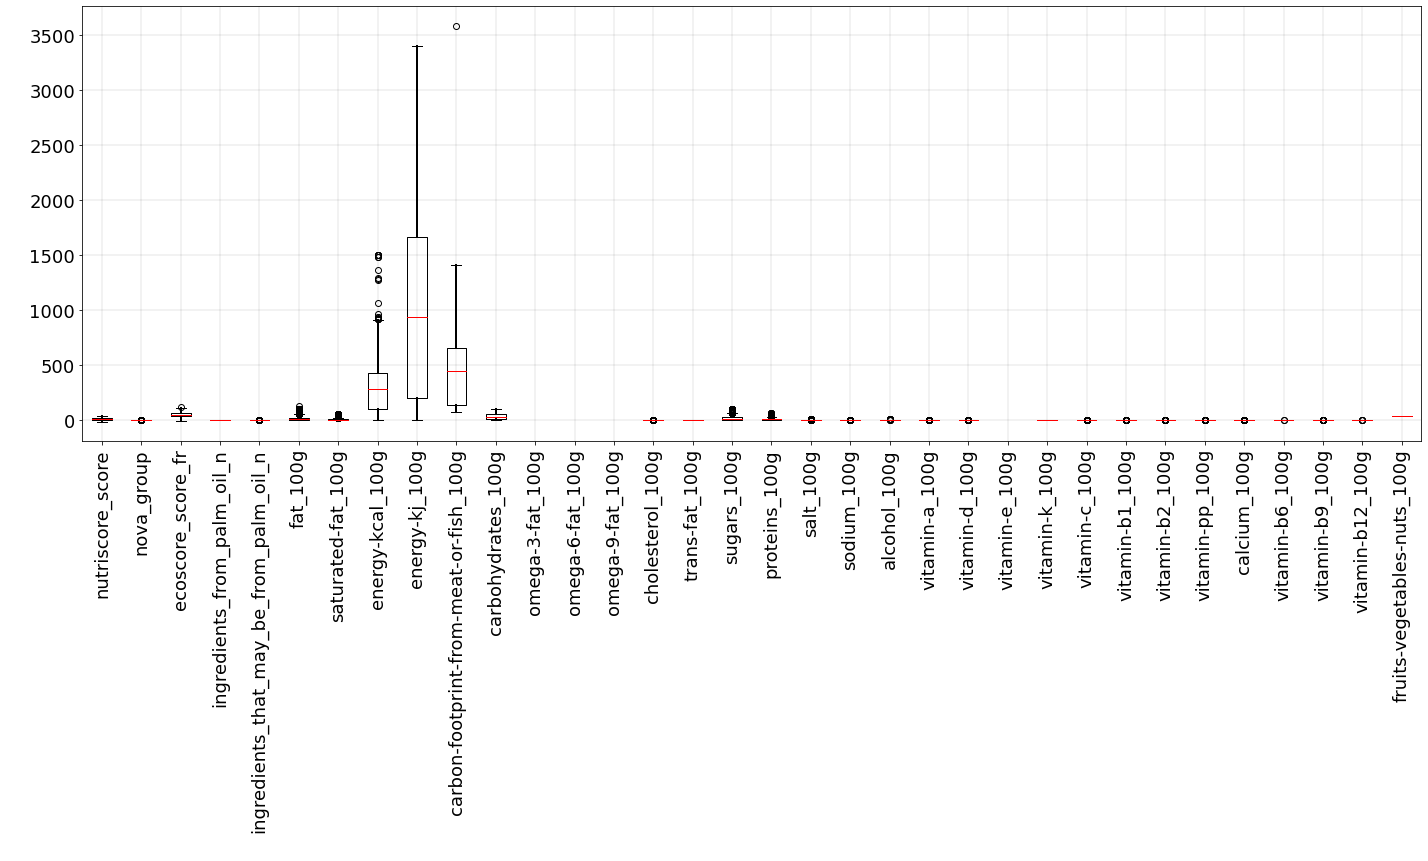

In [107]:
figure_name ='FIGURES/Outliers.jpeg'

ylabel = " "
xlabel = " "
ax = plot_box_plot(df1,xlabel,ylabel)

Energy_cal_100g, energy_kj_100g et carbon-footprint-from-meat-or-fish_100g ont des valeurs 
aberrant tres eleve. Je vais appliquer unfiltrage pour chaque variable

#### Traiter les valeurs manquants

In [108]:
Null = df1.isnull().sum() 
Na = df1.isna().sum()
df_NaN = pd.DataFrame(data=Na)
print(df_NaN)

                                            0
product_name                              399
categories                               3567
nutriscore_grade                         4832
nutriscore_score                         4832
nova_group                               3624
ecoscore_grade_fr                        7810
ecoscore_score_fr                        7810
countries_en                               27
origins_tags                             9297
labels                                   8581
allergens                                8148
additives_en                             5090
ingredients_from_palm_oil_n              3055
ingredients_that_may_be_from_palm_oil_n  3055
fat_100g                                 1499
saturated-fat_100g                       2359
energy-kcal_100g                         1488
energy-kj_100g                           9310
carbon-footprint-from-meat-or-fish_100g  9363
carbohydrates_100g                       1487
omega-3-fat_100g                  

##### Most of the variables has more than half data missing. There is no point of using those variables (eg. omega 3, omega, omega 9, vitamines, fibres, mineraux et ecoscore). Thus they will be excluded from our dataset needed for this project

Je fait le choix de dans un premier temps supprimer certain variables que sont truffée de données manquantes (plus de 50% de valeurs manquantes) 


In [109]:
df_final = isnull_values_sum(df1)

4690.5


1
 J'ai fait le choix de ne pas imputer les valeurs manquantes cars pour mon projet, cela engendrait des erreurs sur la proposition des produits sain.

In [111]:
df_final.head()

,product_name,categories,nova_group,countries_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,saturated-fat_100g,energy-kcal_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,jeunes pousses,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vitória crackers,NaN,NaN,France,NaN,NaN,7.0,3.08,375.0,70.1,15.0,7.8,1.4,0.56
2,Cacao,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Filetes de pollo empanado,NaN,NaN,Spain,NaN,NaN,1.9,1.00,163.9,NaN,NaN,15.3,1.1,0.44
4,Hamburguesas de ternera 100%,NaN,NaN,Spain,NaN,NaN,15.1,6.10,874.9,2.6,1.0,15.7,2.1,0.84


#### Les données catégorielles :


Feature Scaling : Normalisation et standardisation

Les variables qui composent un DataFrame ne sont pas toujours à la même échelle. L’âge et la taille par exemple n’ont pas la même mesure. Ainsi, pour équilibrer le poids de chacune des variables au sein du DataFrame, il conviendra de « scaler » les variables autrement dit les mettre à la même échelle. Cette étape est très importante notamment dans les modèles qui utilisent des mesures de distance linéaire et qui seront fortement impactées par ce genre de déséquilibre.

Deux cas de figure se présentent à nous : lorsque la distribution d’une variable suit une loi normale et lorsqu’elle ne suit pas une loi normale. 

Si elle ne suit pas une loi normale il convient d’appliquer un « min-max scaling », ses valeurs seront dans un intervalle [0,1].

X’=(X-X_min)/(X_max  – X_min)

Si la variable suit une distribution normale, on parlera de standardisation. Pour ce faire on soustrait la moyenne et on divise par l’écart type.

X’=(X – μ)/σ

Où µ ou σ sont la moyenne et l’écart type de la distribution.


In [ ]:
#On importe la fonction StandardScaler() de la librairie scikit learn

from sklearn.preprocessing import StandardScaler

standardisation=StandardScaler()

df_nomdelacolonne_standardisee=standardisation.fit_transform(df['nomdelacolonne'])



